In [83]:
import sklearn
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn import datasets

In [84]:
calhouse = sklearn.datasets.fetch_california_housing()
dfx = pd.DataFrame(calhouse.data, columns = calhouse.feature_names)
dfy = pd.DataFrame(calhouse.target, columns =['y'])
df = pd.concat([dfx,dfy],axis=1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [85]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


- 중앙값과 평균값의 차이가 크지 않은 것으로 보아 이상치로 인한 문제는 별로 없다.

### 스탠다드 스케일링

In [86]:
columns=calhouse.feature_names+['y']
columns

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'y']

In [87]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
std.fit(df)
df_scaled=std.transform(df)
df_scaled=pd.DataFrame(df_scaled,columns=columns)
df_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900
...,...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826,-1.115804
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722,-1.124470
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713,-0.992746
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626,-1.058608


### 로버스트 스케일링 - 스탠다드 스케일링과 비슷

In [89]:
from sklearn.preprocessing import RobustScaler

rbs=RobustScaler()
rbs.fit(df)
df_rscaled=std.transform(df)
df_rscaled=pd.DataFrame(df_rscaled,columns=columns)
df_rscaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,y
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900
...,...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826,-1.115804
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722,-1.124470
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713,-0.992746
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626,-1.058608


- 스탠다드 스케일링과 똑같이 스케일링 하였다.

### 피처 셀렉션

<Axes: >

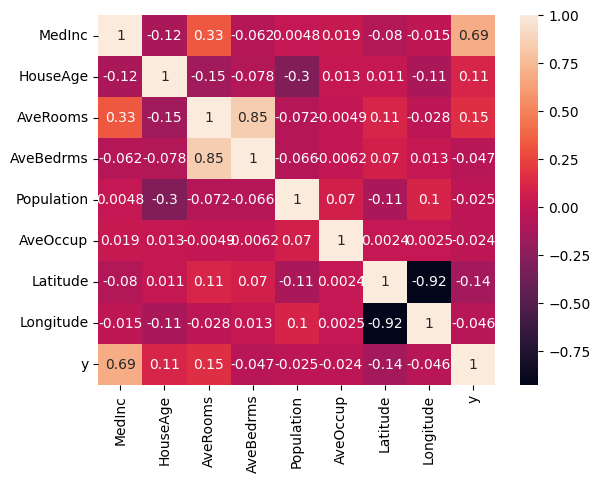

In [69]:
import seaborn as sns
sns.heatmap(df_scaled.corr(),annot=True)

- Latitude-Longtitude: 강한 음의 상관성
- AveRooms-AveBedrms: 강한 양의 상관성
> 다중공선성 감소를 위해 y와 덜 상관이 있는 Longtitude, AveBedrms 삭제

### 모델 사용

In [94]:
# 전체 컬럼 사용
model_All = sm.OLS.from_formula('y~'+'+'.join(calhouse.feature_names),data=df).fit()
model_All.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                        07:55:48   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.9419      0.659    -56.067      0.000     -38.233     -35.650
MedInc         0.4367      0.004    104.054      0.000       0.428       0.445
HouseAge       0.0094      0.000     21.143      0.000       0.009       0.010
AveRooms      -0.1073      0.006    -18.235      0.000      -0.119      -0.096
AveBedrms      0.6451      0.028     22.928      0.000       0.590       0.700
Population -3.976e-06   4.75e-06     -0.837      0.402   -1.33e-05    5.33e-06
AveOccup      -0.0038      0.000     -7.769      0.000      -0.005      -0.003
Latitude      -0.4213      0.007    -58.541      0.000      -0.435      -0.407
Longitude     -0.4345      0.008    -57.682      0.000      -0.449      -0.420
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
# 전체 컬럼 사용 + 스케일링
model_All_s = sm.OLS.from_formula('y~'+'+'.join(calhouse.feature_names),data=df_scaled).fit()
model_All_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                        07:55:53   Log-Likelihood:                -19669.
No. Observations:               20640   AIC:                         3.936e+04
Df Residuals:                   20631   BIC:                         3.943e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.663e-16      0.004    6.1e-14      1.000      -0.009       0.009
MedInc         0.7190      0.007    104.054      0.000       0.705       0.732
HouseAge       0.1029      0.005     21.143      0.000       0.093       0.112
AveRooms      -0.2301      0.013    -18.235      0.000      -0.255      -0.205
AveBedrms      0.2649      0.012     22.928      0.000       0.242       0.288
Population    -0.0039      0.005     -0.837      0.402      -0.013       0.005
AveOccup      -0.0341      0.004     -7.769      0.000      -0.043      -0.025
Latitude      -0.7798      0.013    -58.541      0.000      -0.806      -0.754
Longitude     -0.7544      0.013    -57.682      0.000      -0.780      -0.729
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                         6.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
# 피처셀렉션
model1 = sm.OLS.from_formula('y~'+'+'.join(['MedInc','HouseAge','AveRooms','Population','AveOccup','Latitude']),data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     3739.
Date:                Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                        07:56:38   Log-Likelihood:                -24648.
No. Observations:               20640   AIC:                         4.931e+04
Df Residuals:                   20633   BIC:                         4.937e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5493      0.098     15.739      0.000       1.356       1.742
MedInc         0.4370      0.003    139.640      0.000       0.431       0.443
HouseAge       0.0176      0.000     37.247      0.000       0.017       0.019
AveRooms      -0.0205      0.002     -8.410      0.000      -0.025      -0.016
Population  1.983e-05   5.22e-06      3.797      0.000    9.59e-06    3.01e-05
AveOccup      -0.0046      0.001     -8.509      0.000      -0.006      -0.004
Latitude      -0.0443      0.003    -16.710      0.000      -0.050      -0.039
==============================================================================
Omnibus:                     4379.455   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11132.049
Skew:                           1.162   Prob(JB):                         0.00
Kurtosis:                       5.747   Cond. No.                     3.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
# 피처셀렉션 + 스케일링
model2 = sm.OLS.from_formula('y~'+'+'.join(['MedInc','HouseAge','AveRooms','Population','AveOccup','Latitude']),data=df_scaled).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     3739.
Date:                Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                        07:56:41   Log-Likelihood:                -21693.
No. Observations:               20640   AIC:                         4.340e+04
Df Residuals:                   20633   BIC:                         4.346e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.663e-16      0.005   5.53e-14      1.000      -0.009       0.009
MedInc         0.7194      0.005    139.640      0.000       0.709       0.729
HouseAge       0.1918      0.005     37.247      0.000       0.182       0.202
AveRooms      -0.0439      0.005     -8.410      0.000      -0.054      -0.034
Population     0.0195      0.005      3.797      0.000       0.009       0.030
AveOccup      -0.0411      0.005     -8.509      0.000      -0.051      -0.032
Latitude      -0.0820      0.005    -16.710      0.000      -0.092      -0.072
==============================================================================
Omnibus:                     4379.455   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11132.049
Skew:                           1.162   Prob(JB):                         0.00
Kurtosis:                       5.747   Cond. No.                         1.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 비교
###1. 전체 칼럼
###2. 전체 칼럼 + 스케일링
- 1과 전체적으로 같지만, 다중공선성 수치가 크게 낮아짐

###3. 피처셀렉션

<1과 비교했을 때>
- R-squared, Adj. R-squared 의 수치가 떨어짐
- F-statistic는 더 좋아짐(낮아짐)
- AIC, BIC, 다중공선성 수치가 올라감

###4. 피처셀렉션 + 스케일링

<2와 비교했을 때>
- R-squared, Adj. R-squared 의 수치가 떨어짐
- F-statistic, 다중공선성 수치 더 좋아짐(낮아짐)
- AIC, BIC가 올라감

<3과 비교했을 때>
- AIC, BIC, 다중공선성 수치 낮아짐


# 결론
1. R-squared, Adj. R-squared, AIC, BIC 수치는 모든 칼럼을 다 사용했을 때가 제일 좋게 나온다.
2. 하지만 모든 칼럼을 다 넣는 것은 좋지 않다.
3. 따라서 상관계수를 통해 특정 칼럼을 배재하고, 스케일링을 수행한 4번의 결과가 더 유의미하다고 생각한다.